# TIPS:

## Handle Categorical Variables

### Convert CV's to Number

One of the easiest way to handle CV's are to convert them into number and then process them

#### Label Encoder

It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). Numerical labels are always between 0 and n_classes-1. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_csv('../files/banking_logistic.csv', header=0)

# remove all the rows with missing data
data = data.dropna()

print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


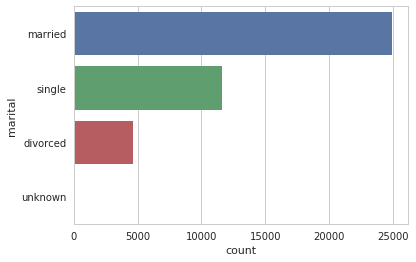

In [3]:
sns.countplot(y='marital', data=data)

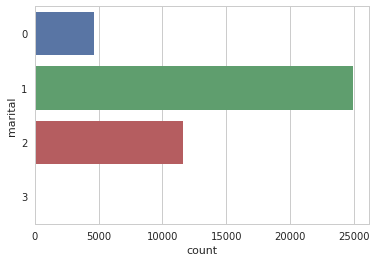

In [57]:
from sklearn.preprocessing import LabelEncoder

num = LabelEncoder()
data['marital'] = num.fit_transform(data['marital'].astype('str'))
sns.countplot(y='marital', data=data)

#### Convert numeric bins to number:

If you have bins (such as age group, class group, %age group etc.) of a continuous variable are available in the data set.
They can be converted to numbers by 
- Either using the above label method, or
- create a meaningful value out of it using some mathematical operation such as mean, median or mode etc for each bin. 
- Create two additional variables containing both lower and higher value

### Combine Levels

- Combine levels: To avoid redundant levels in a categorical variable and to deal with rare levels, we can simply combine the different levels. There are various methods of combining levels. Here are commonly used ones:

    - Using Business Logic: It is one of the most effective method of combining levels. It makes sense also to combine similar levels into similar groups based on domain or business experience. For example, we can combine levels of a variable “zip code” at state or district level. This will reduce the number of levels and improve the model performance also.
    - Using frequency or response rate: Combining levels based on business logic is effective but we may always not have the domain knowledge. Imagine, you are given a data set from Aerospace Department, US Govt. How would you apply business logic here? In such cases, we combine levels by considering the frequency distribution or response rate.

        - To combine levels using their frequency, we first look at the frequency distribution of of each level and combine levels having frequency less than 5% of total observation (5% is standard but you can change it based on distribution). This is an effective method to deal with rare levels.
        - We can also combine levels by considering the response rate of each level. We can simply combine levels having similar response rate into same group.
        - Finally, you can also look at both frequency and response rate to combine levels. You first combine levels based on response rate then combine rare levels to relevant group.



### Dummy Coding

Dummy coding is a commonly used method for converting a categorical input variable into continuous variable. ‘Dummy’, as the name suggests is a duplicate variable which represents one level of a categorical variable. Presence of a level is represent by 1 and absence is represented by 0. For every level present, one dummy variable will be created. Look at the representation below to convert a categorical variable using dummy variable.

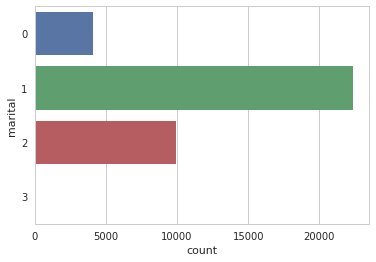

In [54]:
d_yes = data[data['y'] == 1]
sns.countplot(y='marital', data=d_yes)

d_no = data[data['y'] == 0]
sns.countplot(y='marital', data=d_no)

# Reference
- https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
- https://stats.idre.ucla.edu/stata/faq/how-can-i-quickly-convert-many-string-variables-to-numericvariables/